In [1]:
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

/Users/raisariabinina/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/raisariabinina/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Данные:
Будем работать с датасетом [The Iris Dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
X, y = data['data'], data['target']

In [5]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

### Задание:
Будем решать задачу классификации на 3 класса. В качестве модели используется нейронная сеть с одним скрытым слоем. Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа нейронов скрытого слоя. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа нейронов скрытого слоя.

In [6]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [7]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [8]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [9]:
%%time
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 98.00% (1.63%)
CPU times: user 28.9 s, sys: 5.97 s, total: 34.8 s
Wall time: 20.4 s


## Решение

In [10]:
%%time
res = []
for i in range(1,10):
    def baseline_model():
        model = Sequential()
        model.add(Dense(i, input_dim=4, activation='relu'))
        model.add(Dense(3, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model
    estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    res.append(cross_val_score(estimator, X, dummy_y, cv=kfold))

CPU times: user 5min 46s, sys: 54.6 s, total: 6min 40s
Wall time: 4min 30s


## График к 3 заданию

In [11]:
import matplotlib.pyplot as plt
x = range(1,10)
y =  [x.mean() for x in res]
std = [x.std() for x in res]
plt.figure(figsize = (10,7))
plt.plot(x, y, linewidth=2)
plt.errorbar(x,y, std, fmt='none', color="red", elinewidth=1, uplims=True, lolims=True)
plt.xlabel("Number of hidden neurons", {"fontsize":"x-large"})
plt.ylabel("Accuracy", {"fontsize":"x-large"})
plt.savefig(fname="IrisClassifCvScore",format="png")

## Решение задания 4

In [12]:
from keras.callbacks import Callback

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
history = LossHistory()

callbacks_list = [history]

def baseline_model():
        model = Sequential()
        model.add(Dense(8, input_dim=4, activation='relu'))
        model.add(Dense(3, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
res = cross_val_score(estimator, X, dummy_y, cv=kfold, fit_params={'callbacks': callbacks_list})

In [13]:
history.losses

[0.91343087,
 2.2559848,
 3.2184353,
 1.9566876,
 2.1786382,
 2.7765348,
 0.8188329,
 2.0814724,
 1.3584087,
 0.73660505,
 1.3795354,
 1.9283531,
 1.7202187,
 1.6869936,
 0.8117544,
 2.3216527,
 1.4003408,
 1.75759,
 1.3624846,
 0.88367546,
 1.2780842,
 1.811644,
 1.714999,
 2.1189926,
 1.8205996,
 0.9585104,
 1.1499593,
 1.660477,
 1.3996017,
 1.1141111,
 1.5402848,
 1.3404635,
 1.898907,
 1.1801274,
 1.5919831,
 0.78387207,
 1.4439223,
 1.0709947,
 1.8517494,
 1.1119143,
 0.66285604,
 1.5203928,
 1.058498,
 2.2847419,
 1.0888553,
 1.4393109,
 1.7566774,
 1.5344383,
 1.2738321,
 1.0078213,
 1.2747456,
 1.7504578,
 1.8071423,
 1.1243902,
 1.3854032,
 1.040249,
 1.1490691,
 1.0327654,
 1.344244,
 1.1113434,
 1.0185297,
 1.1660818,
 1.0825506,
 0.8861023,
 1.1346107,
 1.1277004,
 1.3252097,
 1.3315877,
 1.0571253,
 0.7822219,
 1.1240547,
 1.0094078,
 1.0487094,
 1.1076518,
 1.0312086,
 1.0669564,
 1.3082032,
 1.0251167,
 1.1626699,
 1.072108,
 0.94101304,
 1.0028794,
 1.0130341,
 1.01812

Text(0,0.5,'Accuracy')

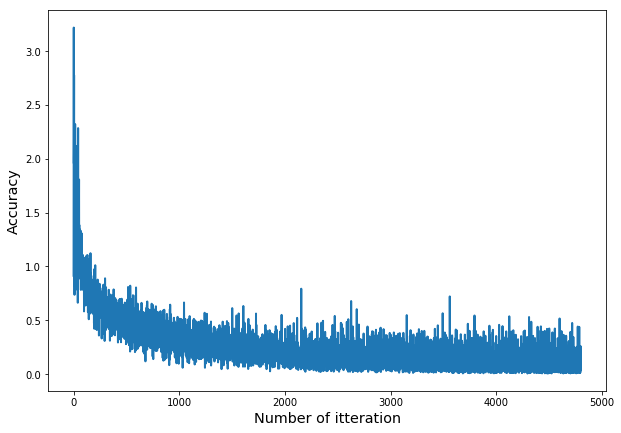

In [14]:
import matplotlib.pyplot as plt
x = range(0,4800)
y =  history.losses
plt.figure(figsize = (10,7))
plt.plot(x, y, linewidth=2)

plt.xlabel("Number of itteration", {"fontsize":"x-large"})
plt.ylabel("Accuracy", {"fontsize":"x-large"})

In [15]:
history_2 = LossHistory()

model = baseline_model()
model.fit(X, dummy_y,epochs=200, batch_size=5, verbose=0, callbacks=[history_2])

In [16]:
len(history_2.losses)

6000

Text(0,0.5,'Accuracy')

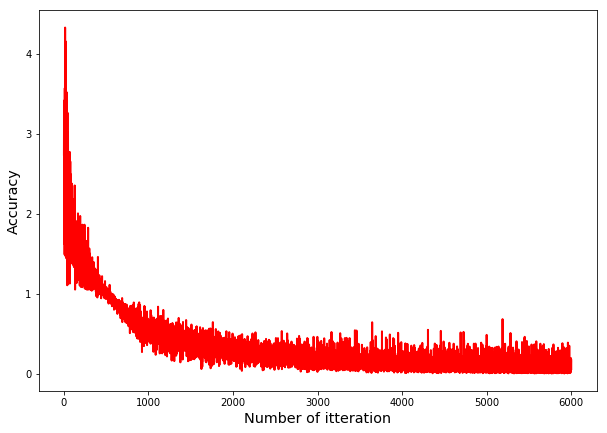

In [17]:
x = range(0,6000)
y =  history_2.losses
plt.figure(figsize = (10,7))
plt.plot(x, y, linewidth=2, color='red')

plt.xlabel("Number of itteration", {"fontsize":"x-large"})
plt.ylabel("Accuracy", {"fontsize":"x-large"})

Добавим шум в данные

In [18]:
def get_noisy(X_train, scale):
    noise = np.random.normal(loc=0.0, scale=scale, size=X_train.shape)
    return(X_train + noise)

In [19]:
X_noisy = get_noisy(X, 0.2)

In [20]:
history_3 = LossHistory()

model = baseline_model()
model.fit(X_noisy, dummy_y,epochs=200, batch_size=5, verbose=0, callbacks=[history_3])


In [21]:
len(history_3.losses)

6000

In [41]:
def get_smooth(y, window_size=10):
    y_smooth = []
    for i in range(len(y)) :
        first = max(0, i - window_size)
        last = i+1
        y_smooth.append(sum(y[first:last])/(last-first))
    return y_smooth

Text(0,0.5,'Accuracy')

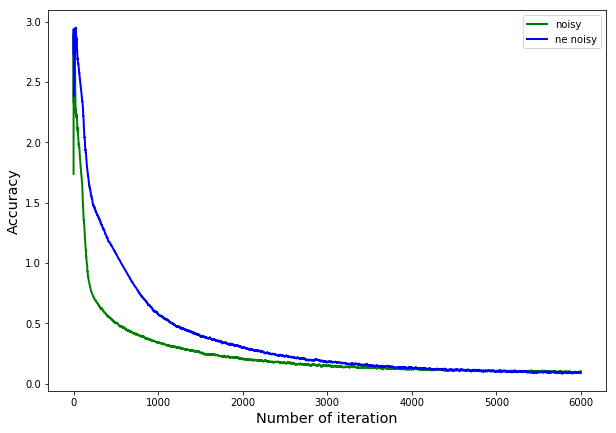

In [45]:
x = range(0,6000)
y = history_3.losses
plt.figure(figsize = (10,7))
    
plt.plot(x, get_smooth(y), linewidth=2, color='green', label='noisy')
plt.plot(x, get_smooth(history_2.losses), linewidth=2, color='blue', label='ne noisy')
plt.legend()

plt.xlabel("Number of iteration", {"fontsize":"x-large"})
plt.ylabel("Accuracy", {"fontsize":"x-large"})